In [22]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
print(tf.__version__)
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
from sklearn.model_selection import train_test_split
import pandas as pd
# augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Menetapkan batas waktu pelatihan
import time
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image  # This should now work without errors.
# from google.colab import drive
# drive.mount('/content/drive')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.18.0


In [23]:
# Contoh data gambar
base_dir = '/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/folder_dataset/animal/animal_dataset'
image_paths = []
labels = []
train_dir = os.path.join(base_dir,'train')

for class_name in ['bird', 'butterfly', 'elephant','swan','tiger']:
    class_dir = os.path.join(train_dir, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        image_paths.append(img_path)
        labels.append(class_name)



In [24]:
# Split dataset into training (60%) and validation (40%)
X_train, X_val, y_train, y_val = train_test_split(image_paths, labels, test_size=0.4, random_state=42)

In [25]:
print(len(X_train),len(X_val))
print(len(y_train),len(y_val))

15 10
15 10


In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    #validation_split=0.3  # 40% untuk validation
    )
val_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_train, 'class': y_train}), # direktori data latih
    x_col='filename',
    y_col='class',
    target_size=(150,150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=32,
    class_mode='categorical', # menggunakan categorical karena klasifikasi lebih dari 2 kelas
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_val, 'class': y_val}), # direktori data validasi
    x_col='filename',
    y_col='class',
    target_size=(150,150), # mengubah resolusi gambar menjadi 150x150 piksel
    batch_size=32,
    class_mode='categorical',
)

Found 15 validated image filenames belonging to 5 classes.
Found 10 validated image filenames belonging to 5 classes.


In [27]:
# Proses CNN
model = tf.keras.models.Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(512,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax') # 5 classes output
])

model.summary()

/home/irium/miniconda3/envs/widi1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 15, 15, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,531,717 (51.62 MB)

 Trainable params: 13,531,717 (51.62 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [29]:
start_time = time.time()

model.fit(
    train_generator,
    # steps_per_epoch=train_generator.samples // train_generator.batch_size,
    steps_per_epoch = None,
    validation_data=validation_generator,
    # validation_steps=validation_generator.samples // validation_generator.batch_size,
    validation_steps=None,
    epochs=1000,  # Jumlah epoch (iterasi) pelatihan
    # callbacks=[
    #     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    #     tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: (
    #         model.stop_training if (time.time() - start_time) > 1800 else None))  # 30 menit = 1800 detik
    # ]
)


Epoch 1/1000


/home/irium/miniconda3/envs/widi1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.2667 - loss: 1.6213 - val_accuracy: 0.1000 - val_loss: 1.7959
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.2000 - loss: 1.6971 - val_accuracy: 0.2000 - val_loss: 1.5934
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.3333 - loss: 1.5576 - val_accuracy: 0.1000 - val_loss: 1.6123
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.2667 - loss: 1.4592 - val_accuracy: 0.1000 - val_loss: 1.5972
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.2667 - loss: 1.3764 - val_accuracy: 0.3000 - val_loss: 1.4463
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.4000 - loss: 1.2827 - val_accuracy: 0.1000 - val_loss: 1.5037
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.7333 - loss: 1.0890 - val_accuracy: 0.2000 - val_loss: 1.4523
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.5333 - loss: 1.0720 - val_accuracy: 0.1000 - val_loss:

In [30]:
# Load history
history = model.history

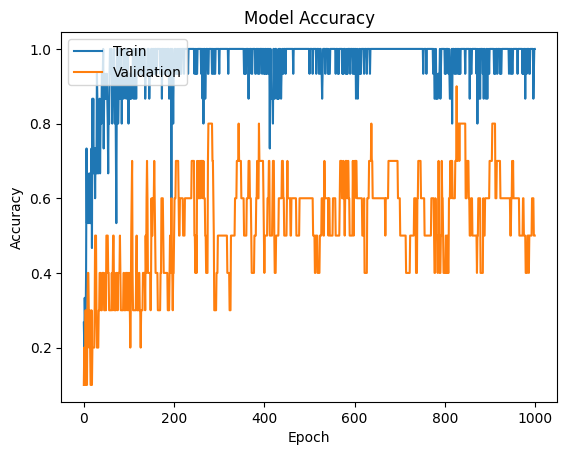

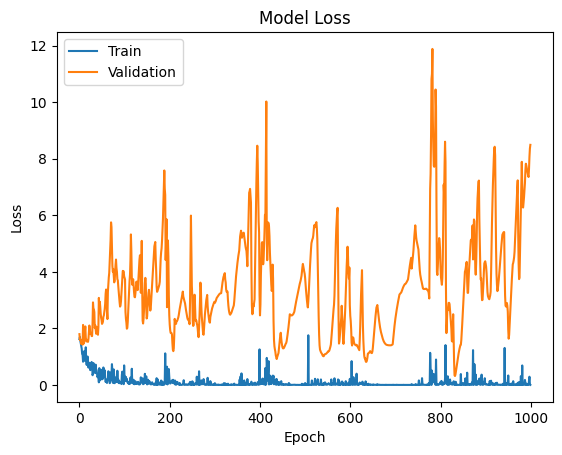

In [31]:
# Plot akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot los pelatihan dan validasi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Simpan atau panggil kembali `model`

In [32]:
# model.save('/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/program_application/UAS_AI_S2_Prof_Ali_Barakbah_Class_Animal/model_e1000_EarlyStopping.h5')

In [33]:
# panggil model jika sudah pernah dibuat sebelumnya
# jika pertama kali menjalankan, komentar kode ini agar tidak error
# model = tf.keras.models.load_model('/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/program_application/UAS_AI_S2_Prof_Ali_Barakbah_Class_Animal/model_e1000.h5')  # Ganti dengan nama file model Anda


In [34]:
# Load model yang sudah dilatih
# model_latih = model

class_names = ['bird', 'butterfly', 'elephant','swan','tiger'] # Ganti dengan nama kelas sebenarnya

# Fungsi untuk melakukan prediksi
def predict_image(img_path):
  # Load gambar dan ubah ukurannya sesuai dengan input model
  img = image.load_img(img_path, target_size=(150, 150))
  # Ubah gambar menjadi array NumPy
  img_array  = image.img_to_array(img)
  # Tambahkan dimensi untuk batch
  img_array  = np.expand_dims(img_array , axis=0)
  # Normalisasi gambar (opsional, tergantung preprocessing saat pelatihan)
  img_array  /= 255.0

  # Melakukan prediksi
  predictions = model.predict(img_array)
  predicted_class = np.argmax(predictions[0])  # Mengambil kelas dengan probabilitas tertinggi
  confidence = predictions[0][predicted_class]  # Mengambil confidence dari prediksi

  # Get class names (assuming you have a list of class names)
  # class_names_rusak = ['rock', 'paper', 'scissors']
  class_names = ['bird', 'butterfly', 'elephant','swan','tiger']

  # Menampilkan hasil prediksi
  print(f'Prediksi: {class_names[predicted_class]} dengan keyakinan {confidence:.2f}')
  # Menampilkan gambar
  img = image.load_img(img_path, target_size=(150, 150))
  plt.imshow(img)
  plt.title(f'Prediksi: {class_names[predicted_class]}')
  plt.show()

# Tahap ini untuk melakukan Prediksi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
Prediksi: bird dengan keyakinan 1.00


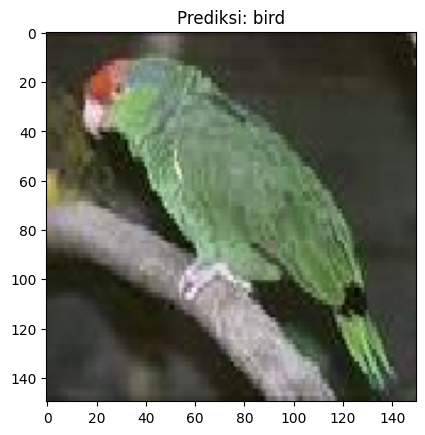

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediksi: bird dengan keyakinan 1.00


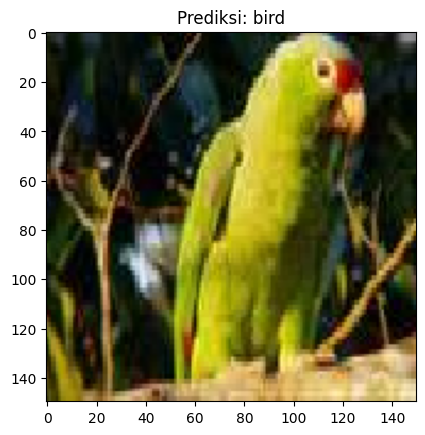

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediksi: swan dengan keyakinan 1.00


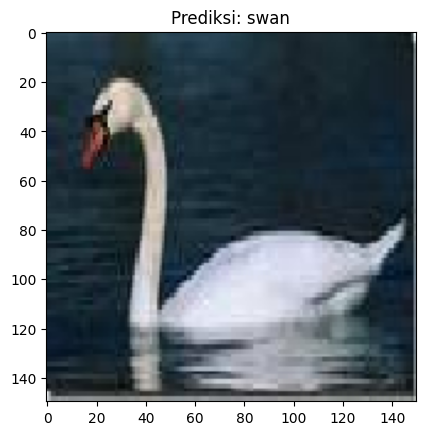

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediksi: tiger dengan keyakinan 1.00


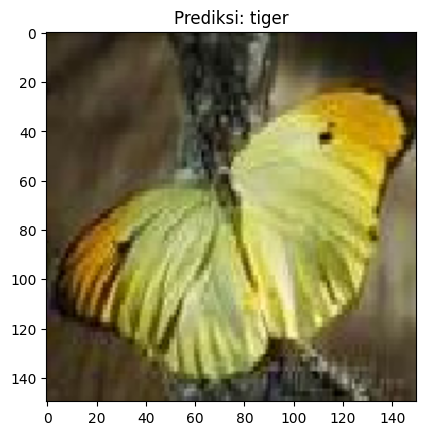

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediksi: elephant dengan keyakinan 1.00


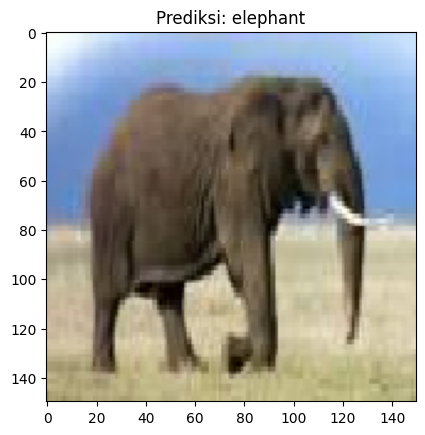

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediksi: elephant dengan keyakinan 1.00


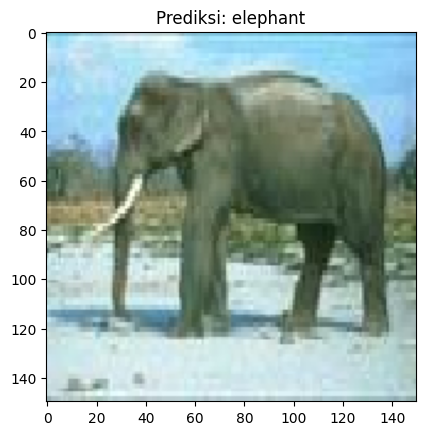

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediksi: swan dengan keyakinan 1.00


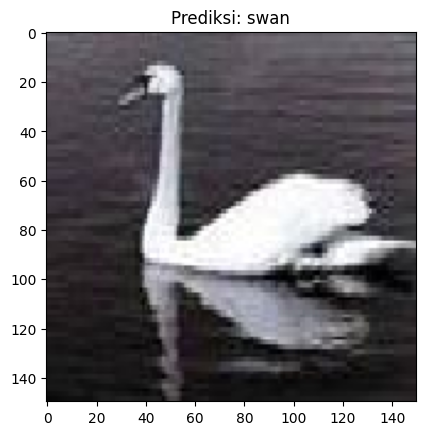

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediksi: tiger dengan keyakinan 1.00


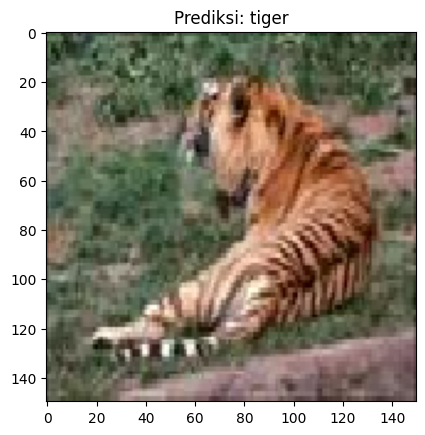

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediksi: tiger dengan keyakinan 1.00


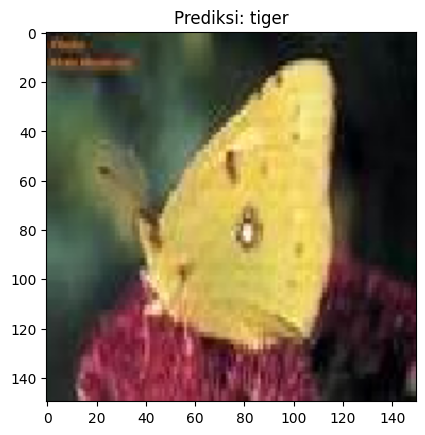

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediksi: tiger dengan keyakinan 1.00


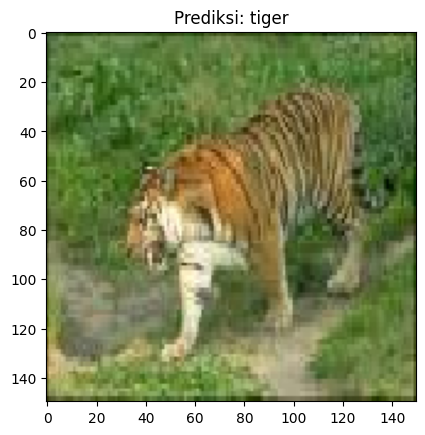

In [35]:
test_images_dir = '/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/folder_dataset/animal/animal_dataset/test/'

# Loop through all files in the test directory
for filename in os.listdir(test_images_dir):
    # Make sure the file is an image (check for .jpg, .jpeg, .png, etc.)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(test_images_dir, filename)
        predict_image(img_path)  # Call the prediction function

# Identitas Penulis
- Nama: Widi Arrohman
- Email: widiarrohman1234@gmail.com